### Draw and import the graph

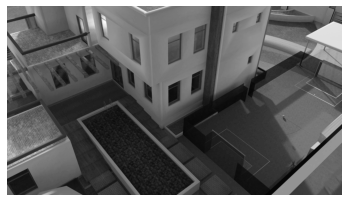

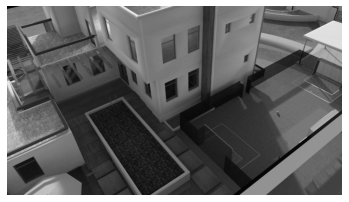

In [4]:
# import the graph
import numpy as np
import matplotlib.pyplot as plt
# import computer vision library
import cv2
# import the image
img = cv2.imread('Frame1.png')
img1_copy = img.copy()
# turn off the x and y axis
plt.axis('off')
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# display the image
plt.imshow(gray, cmap='gray')
plt.show()


img2 = cv2.imread('Frame2.png')
img2_copy = img2.copy()
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.axis('off')

plt.imshow(gray2, cmap='gray')
plt.show()




### Plot the interesting point

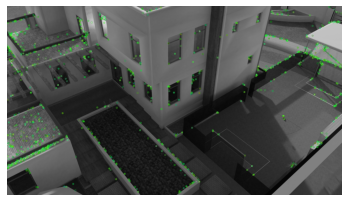

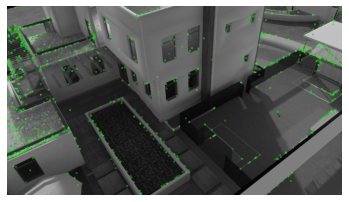

In [12]:
# detect the sailent features
sift = cv2.xfeatures2d.SIFT_create( contrastThreshold=0.045)
kp, des = sift.detectAndCompute(gray, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
# draw the keypoints
for i in kp:
    cv2.circle(img, (int(i.pt[0]), int(i.pt[1])), 5, (0, 255, 0), 1)
plt.axis('off')
plt.imshow(img)
plt.show()
plt.axis('off')
for i in kp2:
    cv2.circle(img2, (int(i.pt[0]), int(i.pt[1])), 5, (0, 255, 0), 1)
plt.imshow(img2)
plt.show()

# Feature matching before filtering

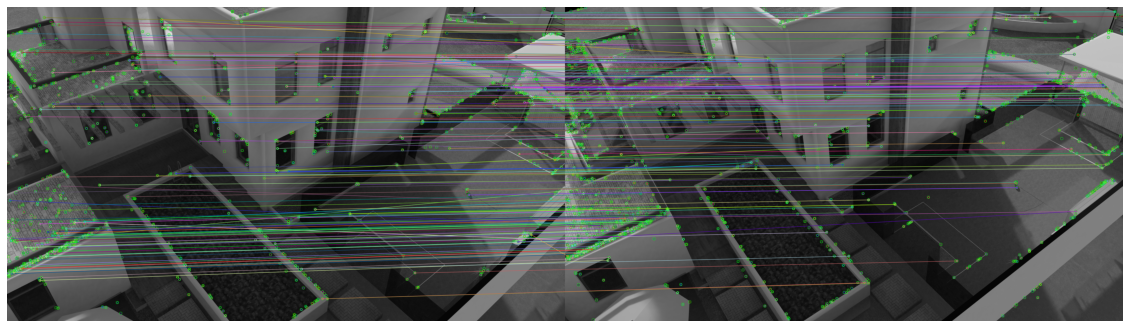

In [17]:
# matche the features
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2, k=2)
good = []
for m, n in matches:
    if m.distance < 0.65 * n.distance:
        good.append([m])
img3 = cv2.drawMatchesKnn(img, kp, img2, kp2, good, None, flags=2)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img3)
plt.show()

# After F constraint

[[ 1.10618787e-08  6.48594081e-07 -5.34247936e-04]
 [ 6.29209080e-07 -2.94289185e-07 -2.69340484e-02]
 [-7.54052604e-05  2.40176337e-02  1.00000000e+00]]


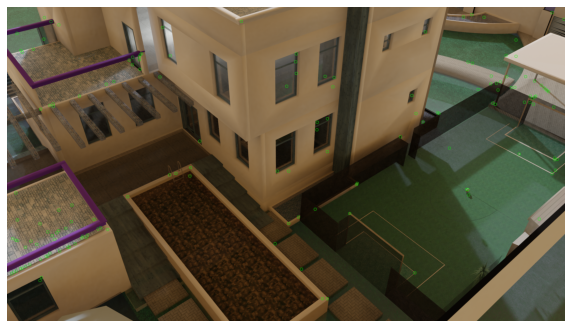

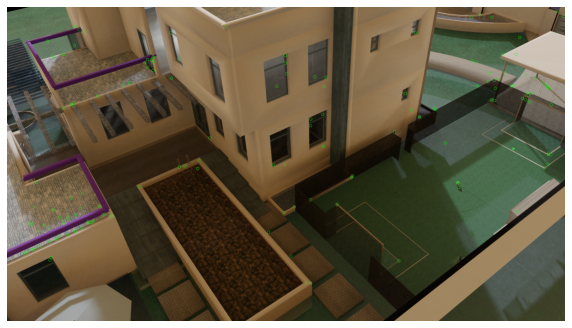

In [29]:
# estimate the fundamental matrix
pts1 = []
pts2 = []

for m in good:
    pts2.append(kp2[m[0].trainIdx].pt)
    pts1.append(kp[m[0].queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)
print(F)
# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]
# draw the epipolar lines
for i in range(len(pts1)):
    cv2.circle(img1_copy, (int(pts1[i][0]), int(pts1[i][1])), 5, (0, 255, 0), 1)
    cv2.circle(img2_copy, (int(pts2[i][0]), int(pts2[i][1])), 5, (0, 255, 0), 1)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img1_copy)
plt.show()
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img2_copy)
plt.show()


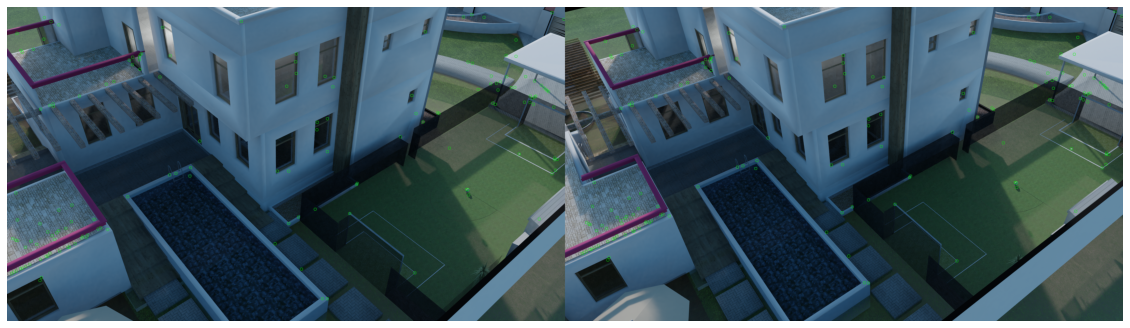

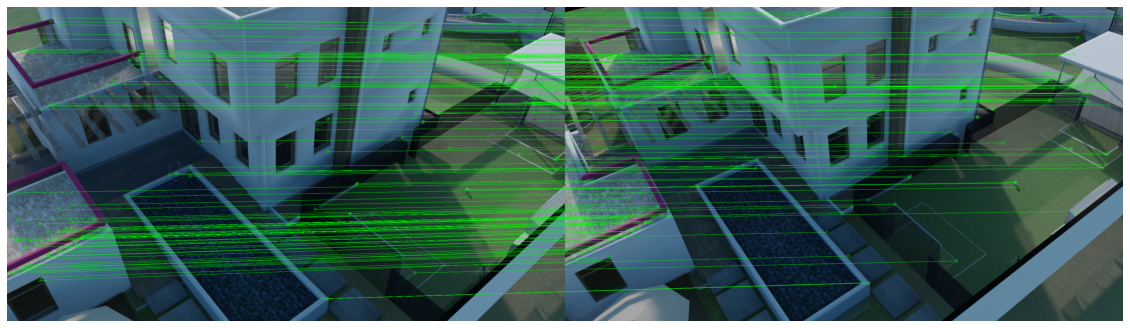

In [28]:
# combine the two images
h1, w1 = img1_copy.shape[:2]
h2, w2 = img2_copy.shape[:2]
vis = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
vis[:h1, :w1, :3] = img1_copy
vis[:h2, w1:w1 + w2, :3] = img2_copy
vis = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(vis)
plt.show()
# draw the matching features
for i in range(len(pts1)):
    cv2.circle(vis, (int(pts1[i][0]), int(pts1[i][1])), 5, (0, 255, 0), 1)
    cv2.circle(vis, (int(pts2[i][0]) + w1, int(pts2[i][1])), 5, (0, 255, 0), 1)
    cv2.line(vis, (int(pts1[i][0]), int(pts1[i][1])), (int(pts2[i][0]) + w1, int(pts2[i][1])), (0, 255, 0), 1)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(vis)
plt.show()


In [101]:
# Camera1
# intrinsic matrix: [[1.600e+03, 0.000e+00, 9.595e+02], 
#  [0.000e+00, 1.600e+03, 5.395e+02], 
#  [0.000e+00, 0.000e+00, 1.000e+00]] 
# Extrinsic matrix (this is the rotation and translation [m] of Camera 1 with respect to the world coordinate system): 
# [[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00], 
#  [-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00], 
#  [ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01], 
#  [ 0., 0., 0., 1.]] 
# Camera2
# Camera 2 (Frame2): 
# Intrinsic matrix: 
# [[1.49333333e+03, 0.00000000e+00, 9.78700000e+02], 
#  [0.00000000e+00, 1.49333333e+03, 5.20300000e+02], 
#  [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]] 
 
# Extrinsic matrix (this is the rotation and translation of Camera 2 with respect to the world 
# coordinate system): 
# [[-0.5845883, -0.81050003, -0.03669427, -2.39520617], 
#  [-0.5041514, 0.39832053, -0.76627171, -1.79913743], 
#  [ 0.6356793, -0.42945388, -0.64146805, 26.26804151], 
#  [ 0., 0., 0., 1.]] 

# Camera1
instrinsic1 = np.array([[1.600e+03, 0.000e+00, 9.595e+02],
                        [0.000e+00, 1.600e+03, 5.395e+02],
                        [0.000e+00, 0.000e+00, 1.000e+00]])

extrinsic1 = np.array([[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00],
                          [-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00],
                            [ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01],
                            [ 0., 0., 0., 1.]])
# Camera2   
instrinsic2 = np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
                        [0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
                        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

extrinsic2 = np.array([[-0.5845883, -0.81050003, -0.03669427, -2.39520617],
                            [-0.5041514, 0.39832053, -0.76627171, -1.79913743],
                            [ 0.6356793, -0.42945388, -0.64146805, 26.26804151],
                            [ 0., 0., 0., 1.]])
# R_vec: 
# [[ 0.9971792 , -0.00348069, 0.07497863], 
#  [ 0.00362138, 0.99999203, -0.00174044], 
#  [-0.07497205, 0.00200697, 0.99718366]] 
 
# T_vec = [-1.98989457, 0.00265269, 0.20979508] [meters]
R_vec = np.array([[ 0.9971792 , -0.00348069, 0.07497863],
                    [ 0.00362138, 0.99999203, -0.00174044], 
                    [-0.07497205, 0.00200697, 0.99718366]])
T_vec = np.array([-1.98989457, 0.00265269, 0.20979508])

e1 = instrinsic2 @ T_vec
a = e1[0]
b = e1[1]
c = e1[2]
e2 = np.array([[0, -c, b], [c, 0, -a], [-b, a, 0]])

epipolar = instrinsic2 @ R_vec @ np.linalg.inv(instrinsic1)
F = e2 @ epipolar
print(F/F[2,2])




points1 = [(1100,1000),(630,540),(410,640)]

points2 = [(1040,950),(660,520),(455,610)]

# map the points1 and points2 to the world coordinate system
points1 = np.array(points1)
points2 = np.array(points2)
points1 = np.hstack((points1, np.ones((points1.shape[0], 1))))
points2 = np.hstack((points2, np.ones((points2.shape[0], 1))))
points1 = np.linalg.inv(instrinsic1) @ points1.T
points2 = np.linalg.inv(instrinsic2) @ points2.T


[[ 7.64315161e-09  1.67264739e-06 -9.48129529e-04]
 [-4.78516067e-07 -2.60194129e-08 -2.50407946e-02]
 [ 3.58785894e-04  2.20686928e-02  1.00000000e+00]]


In [102]:
# reprojectto3dimage 
points1 = np.linalg.inv(extrinsic1) @ points1
points2 = np.linalg.inv(extrinsic2) @ points2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [100]:
cv2.reprojectImageTo3D(points1,extrinsic1)

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/calib3d/src/calibration.cpp:2995: error: (-215:Assertion failed) stype == CV_8UC1 || stype == CV_16SC1 || stype == CV_32SC1 || stype == CV_32FC1 in function 'reprojectImageTo3D'


In [ ]:

# triangulate the points
points3d = cv2.triangulatePoints(extrinsic1, extrinsic2, points1[:2].T, points2[:2].T)
points3d = points3d / points3d[3]
points3d = points3d.T
print(points3d)



